In [135]:
import pandas as pd
import numpy as np
from sklearn import neighbors as nei
from sklearn import metrics as met
from matplotlib import pyplot as plt
from sklearn import decomposition as dec
from sklearn import manifold as man

In [136]:
data = pd.read_csv("data.csv")
data.head()

,cuisine,Numbers of order,Customer_id
0,Fast Food,10,1
1,Cakes & Bakery,2,1
2,Western,1,1
3,Non-alcoholic Drinks,1,1
4,Chinese,4,1


In [137]:
u = data.pivot('Customer_id', 'cuisine', 'Numbers of order')
u.head()

cuisine,American,Asian,Burgers,Cakes & Bakery,Chicken,Chinese,Desserts,European,Fast Food,Filipino,...,Pizza,Sandwiches,Seafood,Singaporean,Sushi,Thai,Turkish,Vegetarian,Vietnamese,Western
Customer_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,NaN,NaN,2.0,NaN,4.0,1.0,NaN,10.0,NaN,...,5.0,NaN,NaN,7.0,NaN,1.0,NaN,NaN,2.0,1.0
2,6.0,NaN,6.0,NaN,NaN,11.0,NaN,NaN,2.0,NaN,...,2.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN,1.0,4.0
3,1.0,NaN,5.0,2.0,1.0,6.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,3.0,2.0
4,2.0,NaN,NaN,1.0,NaN,6.0,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,11.0,NaN,1.0,NaN,NaN,NaN,1.0
5,4.0,2.0,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,9.0


In [138]:
x = (u - u.min(axis = 1).values.reshape(-1,1) ) / (u.max(axis = 1).values.reshape(-1,1) - u.min(axis = 1).values.reshape(-1,1) )*10
x.head()

cuisine,American,Asian,Burgers,Cakes & Bakery,Chicken,Chinese,Desserts,European,Fast Food,Filipino,...,Pizza,Sandwiches,Seafood,Singaporean,Sushi,Thai,Turkish,Vegetarian,Vietnamese,Western
Customer_id,,,,,,,,,,,,,,,,,,,,,
1,1.111111,NaN,NaN,1.111111,NaN,3.333333,0.000000,NaN,10.000000,NaN,...,4.444444,NaN,NaN,6.666667,NaN,0.0,NaN,NaN,1.111111,0.000000
2,3.846154,NaN,3.846154,NaN,NaN,7.692308,NaN,NaN,0.769231,NaN,...,0.769231,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,0.000000,2.307692
3,0.000000,NaN,8.000000,2.000000,0.0,10.000000,0.000000,0.0,NaN,NaN,...,NaN,NaN,NaN,4.000000,NaN,2.0,NaN,NaN,4.000000,2.000000
4,1.000000,NaN,NaN,0.000000,NaN,5.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,10.000000,NaN,0.0,NaN,NaN,NaN,0.000000
5,3.333333,1.111111,NaN,NaN,0.0,3.333333,1.111111,NaN,1.111111,NaN,...,NaN,NaN,NaN,2.222222,NaN,NaN,NaN,NaN,NaN,8.888889


In [139]:
u_scaled = x - x.mean(axis=1).values.reshape(-1,1)
u_scaled.fillna(0,inplace = True)
u_scaled.head()

cuisine,American,Asian,Burgers,Cakes & Bakery,Chicken,Chinese,Desserts,European,Fast Food,Filipino,...,Pizza,Sandwiches,Seafood,Singaporean,Sushi,Thai,Turkish,Vegetarian,Vietnamese,Western
Customer_id,,,,,,,,,,,,,,,,,,,,,
1,-1.203704,0.000000,0.000000,-1.203704,0.000000,1.018519,-2.314815,0.000000,7.685185,0.0,...,2.129630,0.0,0.0,4.351852,0.0,-2.314815,0.0,0.0,-1.203704,-2.314815
2,0.846154,0.000000,0.846154,0.000000,0.000000,4.692308,0.000000,0.000000,-2.230769,0.0,...,-2.230769,0.0,0.0,7.000000,0.0,0.000000,0.0,0.0,-3.000000,-0.692308
3,-2.352941,0.000000,5.647059,-0.352941,-2.352941,7.647059,-2.352941,-2.352941,0.000000,0.0,...,0.000000,0.0,0.0,1.647059,0.0,-0.352941,0.0,0.0,1.647059,-0.352941
4,-1.300000,0.000000,0.000000,-2.300000,0.000000,2.700000,0.000000,0.000000,-0.300000,0.0,...,0.000000,0.0,0.0,7.700000,0.0,-2.300000,0.0,0.0,0.000000,-2.300000
5,0.111111,-2.111111,0.000000,0.000000,-3.222222,0.111111,-2.111111,0.000000,-2.111111,0.0,...,0.000000,0.0,0.0,-1.000000,0.0,0.000000,0.0,0.0,0.000000,5.666667


In [140]:
u_scaled.shape

(100, 37)

In [141]:
train_size = 80
train = u_scaled[:train_size]
test = u_scaled[train_size:]

In [142]:
test.head()

cuisine,American,Asian,Burgers,Cakes & Bakery,Chicken,Chinese,Desserts,European,Fast Food,Filipino,...,Pizza,Sandwiches,Seafood,Singaporean,Sushi,Thai,Turkish,Vegetarian,Vietnamese,Western
Customer_id,,,,,,,,,,,,,,,,,,,,,
81,0.000000,0.000000,0.000000,0.000000,0.0,7.769231,0.000000,0.000000,0.000000,0.0,...,-2.230769,0.0,0.000000,-1.846154,0.0,0.000000,0.0,0.0,0.000000,0.000000
82,-1.050000,0.000000,0.000000,0.000000,0.0,8.150000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,-1.850000,-1.450000,0.0,-0.650000,0.0,0.0,0.000000,0.000000
83,-1.925926,0.296296,0.000000,0.000000,0.0,1.407407,0.000000,0.000000,6.962963,0.0,...,-3.037037,0.0,-0.814815,0.296296,0.0,-0.814815,0.0,0.0,-3.037037,4.740741
84,0.000000,-1.176471,-1.176471,-1.176471,0.0,0.000000,-1.176471,0.000000,8.823529,0.0,...,0.000000,0.0,0.000000,-0.588235,0.0,0.000000,0.0,0.0,0.000000,-1.176471
85,0.000000,0.000000,0.000000,0.000000,0.0,8.542373,-1.457627,-1.457627,-0.101695,0.0,...,-1.118644,0.0,0.000000,1.423729,0.0,0.000000,0.0,0.0,-1.457627,-1.457627


In [143]:
userId = 83

In [144]:
u.loc[userId:userId,:]

cuisine,American,Asian,Burgers,Cakes & Bakery,Chicken,Chinese,Desserts,European,Fast Food,Filipino,...,Pizza,Sandwiches,Seafood,Singaporean,Sushi,Thai,Turkish,Vegetarian,Vietnamese,Western
Customer_id,,,,,,,,,,,,,,,,,,,,,
83,2.0,4.0,NaN,NaN,NaN,5.0,NaN,NaN,10.0,NaN,...,1.0,NaN,3.0,4.0,NaN,3.0,NaN,NaN,1.0,8.0


In [145]:
cuisine = 'Asian'

In [146]:
test_user = test.loc[userId:userId, :]
test_user

cuisine,American,Asian,Burgers,Cakes & Bakery,Chicken,Chinese,Desserts,European,Fast Food,Filipino,...,Pizza,Sandwiches,Seafood,Singaporean,Sushi,Thai,Turkish,Vegetarian,Vietnamese,Western
Customer_id,,,,,,,,,,,,,,,,,,,,,
83,-1.925926,0.296296,0.0,0.0,0.0,1.407407,0.0,0.0,6.962963,0.0,...,-3.037037,0.0,-0.814815,0.296296,0.0,-0.814815,0.0,0.0,-3.037037,4.740741


In [147]:
#numpy method

In [148]:
U, S, VT = np.linalg.svd(train.T, full_matrices=False)

In [149]:
print('U shape', U.shape)
print('S shape', S.shape)
print('VT shape', VT.shape)
print('train shape', train.shape)

U shape (37, 37)
S shape (37,)
VT shape (37, 80)
train shape (80, 37)


In [150]:
np.set_printoptions(suppress=True)
S

array([53.65877148, 36.40588973, 26.37092788, 21.59592335, 19.18879125,
       18.07883193, 16.45965397, 15.99654594, 15.46394813, 14.46092686,
       12.19276864, 11.48953881, 10.80323465,  9.4989763 ,  9.14278922,
        8.83550203,  8.32639733,  7.69136671,  7.55821087,  7.06500529,
        6.3594809 ,  6.25664118,  5.93877772,  5.64198959,  4.89396163,
        4.45717036,  3.59384666,  3.30992167,  3.04520593,  2.78362973,
        2.29388997,  2.13550711,  2.05866414,  1.76743079,  1.30119987,
        1.05022468,  0.        ])

In [151]:
squares = np.array(list(map(lambda x:x**2,S)))
total = squares.sum()

#compute sigma square
for i in range(1,len(squares)):
    r = squares[:i].sum()/ total
    print('first',i,'concepts gives', format(r*100, '.2f'), 'percent of the information')
        

first 1 concepts gives 35.23 percent of the information
first 2 concepts gives 51.45 percent of the information
first 3 concepts gives 59.96 percent of the information
first 4 concepts gives 65.66 percent of the information
first 5 concepts gives 70.17 percent of the information
first 6 concepts gives 74.17 percent of the information
first 7 concepts gives 77.48 percent of the information
first 8 concepts gives 80.61 percent of the information
first 9 concepts gives 83.54 percent of the information
first 10 concepts gives 86.10 percent of the information
first 11 concepts gives 87.92 percent of the information
first 12 concepts gives 89.53 percent of the information
first 13 concepts gives 90.96 percent of the information
first 14 concepts gives 92.06 percent of the information
first 15 concepts gives 93.09 percent of the information
first 16 concepts gives 94.04 percent of the information
first 17 concepts gives 94.89 percent of the information
first 18 concepts gives 95.61 percent of

In [152]:
tsne = man.TSNE(n_components = 2)
reduced = tsne.fit_transform(U)
reduced.shape

/Users/begumceylan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/begumceylan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(37, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

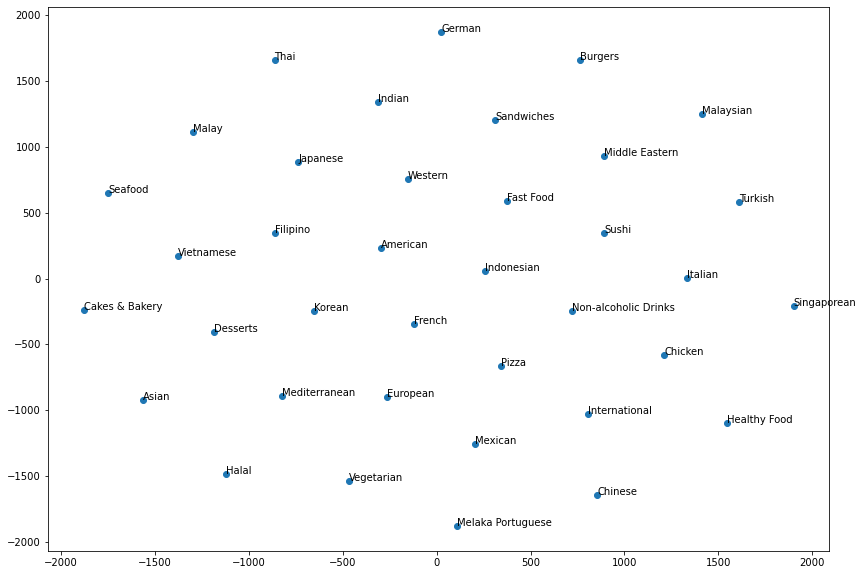

In [153]:
plt.figure(figsize=(14,10))
plt.scatter(reduced[:,0], reduced[:,1])

for i in range(len(train.columns)):
    plt.annotate(train.columns[i], xy = (reduced[i][0], reduced[i][1]))
    
plt.show

In [154]:
U_norm = U / np.linalg.norm(U,axis = 1).reshape(-1,1)

In [155]:
U_norm.shape

(37, 37)

In [156]:
U_norm

array([[ 0.06315742, -0.0303508 ,  0.03203283, ...,  0.00150076,
         0.01944363,  0.16439899],
       [ 0.02517535,  0.08632654, -0.10784382, ..., -0.02819646,
        -0.07055815,  0.16439899],
       [ 0.03040202, -0.00949807,  0.05521264, ..., -0.07718115,
        -0.05728353,  0.16439899],
       ...,
       [ 0.01097132, -0.01352276,  0.00404141, ...,  0.02473294,
        -0.10243584,  0.16439899],
       [ 0.04369879,  0.01019309,  0.04431811, ..., -0.00732695,
        -0.01788117,  0.16439899],
       [ 0.12752051,  0.0345458 ,  0.29933997, ..., -0.00037029,
        -0.02431598,  0.16439899]])

In [157]:
sims = U_norm.dot(U_norm.T)

In [158]:
sims

array([[ 1., -0.,  0., ..., -0.,  0., -0.],
       [-0.,  1., -0., ...,  0., -0.,  0.],
       [ 0., -0.,  1., ..., -0., -0., -0.],
       ...,
       [-0.,  0., -0., ...,  1., -0.,  0.],
       [ 0., -0., -0., ..., -0.,  1., -0.],
       [-0.,  0., -0., ...,  0., -0.,  1.]])

In [159]:
 cuisine = 5
 sims[cuisine].argsort()[::-1]   

array([ 5, 30,  9,  8,  4, 35, 22,  7, 19, 17, 29, 24, 20,  2, 25, 28, 10,
       34, 31,  3, 23, 33, 12, 26, 16, 27, 36, 15, 11, 14,  6,  0, 32, 18,
       21, 13,  1])

In [160]:
cuisine = list(train.columns).index('Desserts')
cuisineNames = np.array(train.columns)
simIndices = sims[cuisine].argsort()[::-1][:20]  
simCuisineS = cuisineNames[simIndices]
simCuisineS

array(['Desserts', 'Cakes & Bakery', 'Asian', 'Healthy Food', 'European',
       'International', 'Filipino', 'Japanese', 'Indian', 'Seafood',
       'Mexican', 'Vietnamese', 'Non-alcoholic Drinks', 'Sushi', 'French',
       'Malay', 'Pizza', 'Sandwiches', 'Turkish', 'American'],
      dtype=object)

In [161]:
data.cuisine.value_counts()

Chinese                 87
Singaporean             86
Fast Food               71
Western                 62
Japanese                56
Indian                  51
Non-alcoholic Drinks    47
American                44
Desserts                44
Burgers                 36
Asian                   35
Healthy Food            34
Thai                    33
Pizza                   30
Cakes & Bakery          28
Chicken                 28
Italian                 27
Korean                  25
Seafood                 23
Vietnamese              20
Malaysian               11
Halal                   10
Indonesian               8
Mexican                  7
European                 6
Sandwiches               6
International            5
Malay                    4
Middle Eastern           3
Vegetarian               3
Filipino                 2
Turkish                  2
French                   1
Melaka Portuguese        1
German                   1
Sushi                    1
Mediterranean            1
N

In [162]:
new_user = test.loc[81:81,:]
new_user

cuisine,American,Asian,Burgers,Cakes & Bakery,Chicken,Chinese,Desserts,European,Fast Food,Filipino,...,Pizza,Sandwiches,Seafood,Singaporean,Sushi,Thai,Turkish,Vegetarian,Vietnamese,Western
Customer_id,,,,,,,,,,,,,,,,,,,,,
81,0.0,0.0,0.0,0.0,0.0,7.769231,0.0,0.0,0.0,0.0,...,-2.230769,0.0,0.0,-1.846154,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
svd = dec.TruncatedSVD(n_components = 18 )
temp = svd.fit_transform(train)
temp.shape

(80, 18)

In [164]:
temp

array([[ 3.89853841,  2.33678946,  7.9032213 , ...,  2.24944371,
         0.29972091, -0.60889435],
       [ 8.04886208,  3.28274607, -0.97715626, ..., -1.32373516,
        -1.88515787, -0.50257533],
       [ 7.64841766, -2.88323243, -0.50212231, ..., -0.16593829,
         0.44279361,  1.83128291],
       ...,
       [10.35143726,  2.04751198, -1.47889875, ...,  1.95455365,
         1.52324806,  0.64778499],
       [ 6.09253205, -3.5195322 , -0.83484151, ..., -0.33989163,
        -0.63026302, -1.07390787],
       [ 9.52062421,  1.49840796, -2.75435002, ...,  0.84202535,
         0.25783066, -0.30360249]])

In [165]:
test_reduced = svd.transform(new_user)
test_reduced.shape

(1, 18)

In [166]:
test.loc[81,'Chinese']

7.769230769230769

In [167]:
svd.components_.shape

(18, 37)

In [168]:
test_reduced = svd.transform(test)

In [169]:
test_reduced.shape

(20, 18)

In [170]:
test.head()

cuisine,American,Asian,Burgers,Cakes & Bakery,Chicken,Chinese,Desserts,European,Fast Food,Filipino,...,Pizza,Sandwiches,Seafood,Singaporean,Sushi,Thai,Turkish,Vegetarian,Vietnamese,Western
Customer_id,,,,,,,,,,,,,,,,,,,,,
81,0.000000,0.000000,0.000000,0.000000,0.0,7.769231,0.000000,0.000000,0.000000,0.0,...,-2.230769,0.0,0.000000,-1.846154,0.0,0.000000,0.0,0.0,0.000000,0.000000
82,-1.050000,0.000000,0.000000,0.000000,0.0,8.150000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,-1.850000,-1.450000,0.0,-0.650000,0.0,0.0,0.000000,0.000000
83,-1.925926,0.296296,0.000000,0.000000,0.0,1.407407,0.000000,0.000000,6.962963,0.0,...,-3.037037,0.0,-0.814815,0.296296,0.0,-0.814815,0.0,0.0,-3.037037,4.740741
84,0.000000,-1.176471,-1.176471,-1.176471,0.0,0.000000,-1.176471,0.000000,8.823529,0.0,...,0.000000,0.0,0.000000,-0.588235,0.0,0.000000,0.0,0.0,0.000000,-1.176471
85,0.000000,0.000000,0.000000,0.000000,0.0,8.542373,-1.457627,-1.457627,-0.101695,0.0,...,-1.118644,0.0,0.000000,1.423729,0.0,0.000000,0.0,0.0,-1.457627,-1.457627


In [171]:
svd.components_.T.shape

(37, 18)

In [172]:
test_reduced.dot(svd.components_).shape

(20, 37)

In [173]:
myPreds = test_reduced.dot(svd.components_)

In [174]:
myPreds.shape

(20, 37)

In [175]:
met.mean_squared_error(test,myPreds,squared =False)

0.39318397352140555

In [176]:
myPreds.shape

(20, 37)

In [177]:
df= pd.DataFrame(myPreds)


In [178]:
df.columns = test.columns.tolist()
df.index = test.index.tolist()
df = df.round(3)
df 

,American,Asian,Burgers,Cakes & Bakery,Chicken,Chinese,Desserts,European,Fast Food,Filipino,...,Pizza,Sandwiches,Seafood,Singaporean,Sushi,Thai,Turkish,Vegetarian,Vietnamese,Western
81,-0.076,0.167,0.269,-0.291,-0.104,7.650,-0.296,-0.021,-0.135,-0.115,...,-1.767,0.349,0.460,-1.873,0.100,-0.097,-0.024,-0.115,-0.476,-0.138
82,-0.916,-0.049,0.022,0.242,0.026,8.125,-0.287,0.002,-0.029,0.063,...,0.129,0.184,-1.462,-1.459,-0.005,-0.943,-0.094,-0.099,-0.292,-0.020
83,-1.296,0.397,-0.645,0.731,0.174,1.459,-0.591,-0.066,6.985,0.395,...,-2.632,-0.772,-0.800,0.388,0.020,-0.859,0.092,0.056,-2.383,4.680
84,-0.587,-0.869,-1.025,-1.041,0.149,0.009,-0.899,-0.323,8.720,-0.294,...,0.357,0.573,0.344,-0.581,0.156,0.056,-0.152,-0.014,-0.312,-1.266
85,-0.154,-0.283,0.003,-0.433,-0.259,8.478,-1.284,-0.177,-0.160,-0.234,...,-1.119,0.069,0.032,1.429,0.164,0.332,-0.075,-0.085,-0.754,-1.494
86,-0.720,-1.089,0.318,-0.127,-1.379,8.511,-0.614,-0.155,-0.343,0.466,...,-1.023,0.021,-0.071,0.189,0.020,-0.265,-0.105,-0.046,-0.927,-0.007
87,0.310,0.065,-2.804,-0.138,3.158,-3.882,0.328,0.078,-0.051,-0.671,...,0.084,-0.713,-1.748,4.756,-0.251,-0.746,-0.034,-0.075,-1.272,0.024
88,-1.341,-0.054,0.569,-0.309,-0.299,5.248,-0.420,-0.288,-1.692,0.864,...,0.157,-0.965,-0.721,6.323,0.654,-0.395,-0.026,0.035,-0.407,0.214
89,-1.856,0.353,0.708,-0.723,0.014,6.430,-2.703,-0.051,0.084,0.509,...,-0.063,-0.094,-0.853,7.449,-0.244,0.380,-0.089,-0.042,-0.221,-1.497
90,3.800,0.142,-0.464,0.473,0.325,-0.870,-0.260,0.039,-0.118,-0.450,...,-0.164,0.324,0.641,-5.078,0.011,-0.121,0.199,-0.027,-0.391,-0.885


In [179]:
recom = np.array(df.iloc[0,:]).argsort()[::-1]
print(recom)

[ 5 29 28  2  1 31 20 23 22 11 26 10 12  7 33 14  0 21 32  4  9 34  8 36
 17 25 15 19 13  3  6 16 35 24 18 27 30]


In [180]:
df.iloc[0,:].argsort()[::-1].shape

(37,)

In [181]:
myPreds = []

for userId in range(len(test)):
    
    myRecommends = []
    recom = df.iloc[userId,:].argsort()[::-1]
        
    for rec in recom:        
        if np.isnan(x.iloc[userId, (rec)]):
                
            myRecommends.append(test.columns[rec])
            
        i=0
                
        if len(myRecommends) > 2  and i < len(test):                
            break
                
            i += 1

    print('for user',test.index[userId], 'my top 3 recommendations are:' ,myRecommends, '\n' )
                               

for user 81 my top 3 recommendations are: ['Seafood', 'Sandwiches', 'Burgers'] 

for user 82 my top 3 recommendations are: ['Halal', 'Cakes & Bakery', 'Italian'] 

for user 83 my top 3 recommendations are: ['Fast Food', 'Malay', 'Asian'] 

for user 84 my top 3 recommendations are: ['Sandwiches', 'Pizza', 'Seafood'] 

for user 85 my top 3 recommendations are: ['Thai', 'Sushi', 'Sandwiches'] 

for user 86 my top 3 recommendations are: ['Filipino', 'Malaysian', 'Burgers'] 

for user 87 my top 3 recommendations are: ['Chicken', 'Halal', 'Desserts'] 

for user 88 my top 3 recommendations are: ['Filipino', 'Italian', 'Sushi'] 

for user 89 my top 3 recommendations are: ['Filipino', 'Asian', 'Italian'] 

for user 90 my top 3 recommendations are: ['Japanese', 'Malaysian', 'Cakes & Bakery'] 

for user 91 my top 3 recommendations are: ['Singaporean', 'Western', 'Sandwiches'] 

for user 92 my top 3 recommendations are: ['Cakes & Bakery', 'Halal', 'Sandwiches'] 

for user 93 my top 3 recommendatio

In [182]:
test.loc[93:93,:].T.round(10)

Customer_id,93
cuisine,
American,-1.623932
Asian,0.000000
Burgers,0.000000
Cakes & Bakery,-2.393162
Chicken,0.000000
Chinese,0.000000
Desserts,-2.393162
European,0.000000
Fast Food,7.606838


In [183]:
test.head(20)

cuisine,American,Asian,Burgers,Cakes & Bakery,Chicken,Chinese,Desserts,European,Fast Food,Filipino,...,Pizza,Sandwiches,Seafood,Singaporean,Sushi,Thai,Turkish,Vegetarian,Vietnamese,Western
Customer_id,,,,,,,,,,,,,,,,,,,,,
81,0.000000,0.000000,0.000000,0.000000,0.000000,7.769231,0.000000,0.000000,0.000000e+00,0.0,...,-2.230769,0.000000,0.000000,-1.846154,0.0,0.000000,0.00000,0.0,0.000000,0.000000
82,-1.050000,0.000000,0.000000,0.000000,0.000000,8.150000,0.000000,0.000000,0.000000e+00,0.0,...,0.000000,0.000000,-1.850000,-1.450000,0.0,-0.650000,0.00000,0.0,0.000000,0.000000
83,-1.925926,0.296296,0.000000,0.000000,0.000000,1.407407,0.000000,0.000000,6.962963e+00,0.0,...,-3.037037,0.000000,-0.814815,0.296296,0.0,-0.814815,0.00000,0.0,-3.037037,4.740741
84,0.000000,-1.176471,-1.176471,-1.176471,0.000000,0.000000,-1.176471,0.000000,8.823529e+00,0.0,...,0.000000,0.000000,0.000000,-0.588235,0.0,0.000000,0.00000,0.0,0.000000,-1.176471
85,0.000000,0.000000,0.000000,0.000000,0.000000,8.542373,-1.457627,-1.457627,-1.016949e-01,0.0,...,-1.118644,0.000000,0.000000,1.423729,0.0,0.000000,0.00000,0.0,-1.457627,-1.457627
86,-1.444444,-1.444444,0.000000,0.000000,-1.444444,8.555556,0.000000,0.000000,-3.333333e-01,0.0,...,-1.444444,0.000000,0.000000,0.222222,0.0,0.000000,0.00000,0.0,0.000000,0.000000
87,1.136364,0.000000,-3.863636,0.000000,3.636364,-3.863636,0.000000,0.000000,0.000000e+00,0.0,...,0.000000,0.000000,-2.613636,4.886364,0.0,0.000000,0.00000,0.0,0.000000,0.000000
88,-3.039216,0.000000,0.000000,0.000000,0.000000,5.196078,0.000000,0.000000,-1.862745e+00,0.0,...,0.000000,0.000000,0.000000,6.372549,0.0,0.000000,0.00000,0.0,0.000000,0.000000
89,-2.555556,0.000000,0.444444,0.000000,0.000000,6.444444,-2.555556,0.000000,0.000000e+00,0.0,...,0.000000,0.000000,0.000000,7.444444,0.0,0.000000,0.00000,0.0,0.000000,-1.555556
